In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
dataset_path = "/content/drive/My Drive/text_dataset"
print("Folders inside dataset:", os.listdir(dataset_path))

Folders inside dataset: ['healthy', 'parkinsons', 'healthy_wav', 'transcriptions (4).csv', 'transcriptions_preprocessed.csv', 'bert_tokenizer', 'bert_tokenizer_final', 'bert_parkinsons_model_final.pth', 'config.json']


In [ ]:
!pip install openai-whisper torch librosa

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 800.5/800.5 kB 39.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 80.0 MB

In [ ]:
!cp -r "/content/drive/My Drive/text_dataset" .

^C


In [ ]:
print("Actual folders inside dataset:", os.listdir("text_dataset"))


Actual folders inside dataset: ['parkinsons', 'healthy']


In [ ]:
import os
import whisper

# Load Whisper model (base or small model is recommended)
model = whisper.load_model("base")

# Paths
dataset_path = "text_dataset"
output_file = "transcriptions.csv"

parkinsons_audio_path = os.path.join(dataset_path, "parkinsons", "Parkinson-Patient-Speech-Dataset-master", "Parkinson-Patient-Speech-Dataset-master","denoised-speech-dataset")
healthy_audio_path = os.path.join(dataset_path, "healthy", "cv-corpus-21.0-delta-2025-03-14-en", "cv-corpus-21.0-delta-2025-03-14")

# Process each folder
data = []

assert os.path.exists(parkinsons_audio_path), f"❌ Path not found: {parkinsons_audio_path}"
assert os.path.exists(healthy_audio_path), f"❌ Path not found: {healthy_audio_path}"

100%|███████████████████████████████████████| 139M/139M [00:02<00:00, 51.2MiB/s]


In [ ]:
import pandas as pd

In [ ]:
for label, folder_path in [("parkinsons", parkinsons_audio_path), ("healthy", healthy_audio_path)]:
    for file in os.listdir(folder_path):
        if file.endswith(".wav") or file.endswith(".mp3"):
            file_path = os.path.join(folder_path, file)

            print(f"🎙️ Transcribing: {file_path}")
            result = model.transcribe(file_path)
            text = result["text"]

            # Append to data list
            data.append([file, label, text])

# Save results as CSV
df = pd.DataFrame(data, columns=["Filename", "Label", "Transcription"])
df.to_csv(output_file, index=False)

print("✅ Transcription completed! Saved as transcriptions.csv")


✅ Transcription completed! Saved as transcriptions.csv


In [ ]:
import os
import subprocess

input_folder = "/content/drive/My Drive/text_dataset/healthy/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips"
output_folder = "/content/drive/My Drive/text_dataset/healthy_wav"

# Create output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Convert only if WAV file doesn't already exist
for file in os.listdir(input_folder):
    if file.endswith(".mp3"):
        input_path = os.path.join(input_folder, file)
        output_path = os.path.join(output_folder, file.replace(".mp3", ".wav"))

        if not os.path.exists(output_path):  # Skip if already converted
            cmd = f"ffmpeg -i '{input_path}' -ar 16000 -ac 1 -acodec pcm_s16le '{output_path}'"
            subprocess.run(cmd, shell=True, check=True)
            print(f"✅ Converted: {file} → {output_path}")
        else:
            print(f"⏩ Skipped (Already Exists): {file}")


Streaming output truncated to the last 5000 lines.
⏩ Skipped (Already Exists): common_voice_en_41980354.mp3
⏩ Skipped (Already Exists): common_voice_en_41980350.mp3
⏩ Skipped (Already Exists): common_voice_en_41980352.mp3
⏩ Skipped (Already Exists): common_voice_en_41980336.mp3
⏩ Skipped (Already Exists): common_voice_en_41980334.mp3
⏩ Skipped (Already Exists): common_voice_en_41980351.mp3
⏩ Skipped (Already Exists): common_voice_en_41980353.mp3
⏩ Skipped (Already Exists): common_voice_en_41980395.mp3
⏩ Skipped (Already Exists): common_voice_en_41980344.mp3
⏩ Skipped (Already Exists): common_voice_en_41980343.mp3
⏩ Skipped (Already Exists): common_voice_en_41980342.mp3
⏩ Skipped (Already Exists): common_voice_en_41980394.mp3
⏩ Skipped (Already Exists): common_voice_en_41980397.mp3
⏩ Skipped (Already Exists): common_voice_en_41980408.mp3
⏩ Skipped (Already Exists): common_voice_en_41980402.mp3
⏩ Skipped (Already Exists): common_voice_en_41980409.mp3
⏩ Skipped (Already Exists): common_vo

In [ ]:
import os
import pandas as pd
import whisper

# Define paths
healthy_path = "/content/drive/My Drive/text_dataset/healthy_wav/"
parkinsons_base_path = "/content/drive/My Drive/text_dataset/parkinsons/"
parkinsons_dl_path = os.path.join(parkinsons_base_path, "Parkinson-Patient-Speech-Dataset-master",
                                  "Parkinson-Patient-Speech-Dataset-master", "denoised-speech-dataset", "DL")

In [ ]:
import torch
import pandas as pd
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertTokenizer

In [ ]:
# Initialize Whisper model
model = whisper.load_model("base").to("cuda" if torch.cuda.is_available() else "cpu")

def get_wav_files(directory):
    """Retrieve all .wav files from a directory."""
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".wav")]

# Get list of files
healthy_files = get_wav_files(healthy_path)
parkinsons_files = get_wav_files(parkinsons_dl_path)
output_file = "transcriptions.csv"

# Load existing data if CSV already exists
if os.path.exists(output_file):
    df_existing = pd.read_csv(output_file)
else:
    df_existing = pd.DataFrame(columns=["filename", "transcription", "label"])


data = []


In [ ]:
def transcribe_audio(file_list, label, save_every=5):
    """Transcribe audio files and save after every few iterations."""
    for i, file in enumerate(file_list):
        try:
            print(f"🎙️ Transcribing: {os.path.basename(file)}")
            result = model.transcribe(file)
            transcription = result["text"].strip()

            # Append result
            data.append({
                "filename": os.path.basename(file),
                "transcription": transcription,
                "label": label
            })

            # Save progress every `save_every` files
            if (i + 1) % save_every == 0:
                df = pd.DataFrame(data)
                df = pd.concat([df_existing, df]).drop_duplicates().reset_index(drop=True)  # Avoid duplicates
                df.to_csv(output_file, index=False)
                print(f"💾 Progress saved after {i+1} files.")

        except Exception as e:
            print(f"⚠️ Error processing {os.path.basename(file)}: {e}")

#transcribe_audio(healthy_files, "Healthy")
transcribe_audio(parkinsons_files, "Parkinson's")

# Final save
df = pd.DataFrame(data)
df = pd.concat([df_existing, df]).drop_duplicates().reset_index(drop=True)
df.to_csv(output_file, index=False)


print(f"✅ Transcriptions saved to {output_file}")

🎙️ Transcribing: DL22.wav
🎙️ Transcribing: DL26.wav
🎙️ Transcribing: DL10.wav
🎙️ Transcribing: DL21.wav
🎙️ Transcribing: DL19.wav
💾 Progress saved after 5 files.
🎙️ Transcribing: DL23.wav
🎙️ Transcribing: DL1.wav
🎙️ Transcribing: DL18.wav
🎙️ Transcribing: DL25.wav
🎙️ Transcribing: DL16.wav
💾 Progress saved after 10 files.
🎙️ Transcribing: DL2.wav
🎙️ Transcribing: DL17.wav
🎙️ Transcribing: DL3.wav
🎙️ Transcribing: DL32.wav
🎙️ Transcribing: DL39.wav
💾 Progress saved after 15 files.
🎙️ Transcribing: DL31.wav
🎙️ Transcribing: DL34.wav
🎙️ Transcribing: DL28.wav
🎙️ Transcribing: DL27.wav
🎙️ Transcribing: DL35.wav
💾 Progress saved after 20 files.
🎙️ Transcribing: DL37.wav
🎙️ Transcribing: DL38.wav
🎙️ Transcribing: DL29.wav
🎙️ Transcribing: DL36.wav
🎙️ Transcribing: DL30.wav
💾 Progress saved after 25 files.
🎙️ Transcribing: DL49.wav
🎙️ Transcribing: DL52.wav
🎙️ Transcribing: DL4.wav
🎙️ Transcribing: DL55.wav
🎙️ Transcribing: DL51.wav
💾 Progress saved after 30 files.
🎙️ Transcribing: DL42.wav
🎙

In [ ]:
import os

dataset_path = "/content/drive/My Drive/text_dataset"

for root, dirs, files in os.walk(dataset_path):
    for file in files:
        if file.endswith(".wav") or file.endswith(".mp3"):
            print(f"🎵 Found: {os.path.join(root, file)}")


Streaming output truncated to the last 5000 lines.
🎵 Found: /content/drive/My Drive/text_dataset/healthy/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980545.mp3
🎵 Found: /content/drive/My Drive/text_dataset/healthy/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980600.mp3
🎵 Found: /content/drive/My Drive/text_dataset/healthy/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980599.mp3
🎵 Found: /content/drive/My Drive/text_dataset/healthy/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980546.mp3
🎵 Found: /content/drive/My Drive/text_dataset/healthy/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980544.mp3
🎵 Found: /content/drive/My Drive/text_dataset/healthy/cv-corpus-21.0-delta-2025-03-14-en/cv-corpus-21.0-delta-2025-03-14/en/clips/common_voice_en_41980597

In [ ]:
import os

for label in ["parkinsons", "healthy"]:
    folder_path = os.path.join("text_dataset", label)

    if os.path.exists(folder_path):
        subfolders = os.listdir(folder_path)
        print(f"Inside {folder_path}: {subfolders}")

        for subfolder in subfolders:
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                print(f"  -> Files in {subfolder_path}: {os.listdir(subfolder_path)}")
    else:
        print(f"❌ Folder {folder_path} not found!")

Inside text_dataset/parkinsons: ['Parkinson-Patient-Speech-Dataset-master.zip', 'Parkinson-Patient-Speech-Dataset-master']
  -> Files in text_dataset/parkinsons/Parkinson-Patient-Speech-Dataset-master: ['Parkinson-Patient-Speech-Dataset-master']
Inside text_dataset/healthy: ['cv-corpus-21.0-delta-2025-03-14-en']
  -> Files in text_dataset/healthy/cv-corpus-21.0-delta-2025-03-14-en: ['cv-corpus-21.0-delta-2025-03-14']


In [ ]:
base_path = "/content/drive/My Drive/text_dataset/parkinsons/Parkinson-Patient-Speech-Dataset-master/Parkinson-Patient-Speech-Dataset-master/denoised-speech-dataset/"
dl_path = os.path.join(base_path, "DL")
lw_path = os.path.join(base_path, "LW")
tessi_path = os.path.join(base_path, "Tessi")

# Initialize Whisper model
model = whisper.load_model("base")

def get_wav_files(directory):
    """Retrieve all .wav files from a directory."""
    return [os.path.join(directory, f) for f in os.listdir(directory) if f.endswith(".wav")]

# Get list of files from LW and Tessi
lw_files = get_wav_files(lw_path)
tessi_files = get_wav_files(tessi_path)

output_file = "transcriptions.csv"
if os.path.exists(output_file):
    df_existing = pd.read_csv(output_file)
    existing_files = set(df_existing["filename"].tolist())  # Avoid reprocessing
else:
    df_existing = pd.DataFrame(columns=["filename", "transcription", "label"])
    existing_files = set()


data = []

def transcribe_audio(file_list, label, save_every=5):
    """Transcribe audio files and save progress every few files."""
    for i, file in enumerate(file_list):
        try:
            print(f"🎙️ Transcribing: {os.path.basename(file)}")
            result = model.transcribe(file)
            transcription = result["text"].strip()

            data.append({
                "filename": os.path.basename(file),
                "transcription": transcription,
                "label": label
            })

            if (i + 1) % save_every == 0:
                df = pd.DataFrame(data)
                df = pd.concat([df_existing, df]).drop_duplicates().reset_index(drop=True)
                df.to_csv(output_file, index=False)
                print(f"💾 Progress saved after {i+1} files.")

        except Exception as e:
            print(f"⚠️ Error processing {os.path.basename(file)}: {e}")

# Output CSV file
output_file = "transcriptions.csv"

# Transcribe LW and Tessi folders
transcribe_audio(lw_files, "Parkinson's")
transcribe_audio(tessi_files, "Parkinson's")

# Convert to DataFrame and save final results
df = pd.DataFrame(data)
df = pd.concat([df_existing, df]).drop_duplicates().reset_index(drop=True)
df.to_csv(output_file, index=False)

print(f"✅ Transcriptions saved to {output_file}")


KeyError: 'filename'

In [ ]:
import pandas as pd
import re
from transformers import BertTokenizer

df = pd.read_csv("/content/drive/My Drive/text_dataset/transcriptions (4).csv")

# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

# Function to clean and tokenize text
def preprocess_text(text):
    text = str(text).strip()  # Remove leading/trailing spaces
    text = re.sub(r"[^a-zA-Z0-9\s]", "", text)  # Remove special characters
    text = re.sub(r"\s+", " ", text)  # Remove extra spaces
    text = text.lower()  # Convert to lowercase (optional)

    tokens = tokenizer.tokenize(text)  # Tokenize text
    return " ".join(tokens)  # Return tokenized string

df["cleaned_transcription"] = df["transcription"].astype(str).apply(preprocess_text)

df.to_csv("transcriptions_preprocessed.csv", index=False)

print("✅ Improved preprocessing complete! Saved as 'transcriptions_preprocessed.csv'")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

✅ Improved preprocessing complete! Saved as 'transcriptions_preprocessed.csv'


In [ ]:
import pandas as pd
from sklearn.utils import resample

df = pd.read_csv("/content/drive/MyDrive/text_dataset/transcriptions_preprocessed.csv")

df_healthy = df[df["label"] == "Healthy"]
df_parkinsons = df[df["label"] == "Parkinson's"]

# Oversample Parkinson's data
df_parkinsons_oversampled = resample(
    df_parkinsons,
    replace=True,
    n_samples=len(df_healthy),
    random_state=42
)

df_balanced = pd.concat([df_healthy, df_parkinsons_oversampled])

df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)
df_balanced = df_balanced[["cleaned_transcription", "label"]]

df_balanced.to_csv("transcriptions_balanced.csv", index=False)

print(f"✅ Dataset balanced! New counts:\n{df_balanced['label'].value_counts()}")


✅ Dataset balanced! New counts:
label
Parkinson's    1081
Healthy        1081
Name: count, dtype: int64


In [ ]:
df_balanced["cleaned_transcription"] = df_balanced["cleaned_transcription"].fillna("").astype(str)

label_map = {"Healthy": 0, "Parkinson's": 1}  # Adjust based on your actual labels
df_balanced["label"] = df_balanced["label"].map(label_map)


In [ ]:
print(df_balanced["label"].unique())  # Should only contain 0 and 1
print(df_balanced["label"].isna().sum())  # Check for NaNs


[1 0]
0


In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

# Tokenize the dataset
def tokenize_function(examples):
    return tokenizer(examples["cleaned_transcription"], padding="max_length", truncation=True, max_length=256)

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
!pip install datasets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 487.4/487.4 kB 26.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.0
    Uninstalling fsspec-2025.3.0:
      Successfully uninstalled fsspec-2025.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.0 requires fsspec==2025.3.0, but you have fsspec 2024.12.0 which is incompatible.


In [ ]:
from datasets import Dataset
dataset = Dataset.from_pandas(df_balanced)

# Apply tokenization
dataset = dataset.map(tokenize_function, batched=True)
dataset = dataset.rename_column("label", "labels")
dataset = dataset.remove_columns(["cleaned_transcription"])

# Split into train & test
train_test_split = dataset.train_test_split(test_size=0.2, seed=42)
train_dataset = train_test_split["train"]
test_dataset = train_test_split["test"]
train_dataset = train_dataset.with_format("torch")
test_dataset = test_dataset.with_format("torch")

Map:   0%|          | 0/2162 [00:00<?, ? examples/s]

In [ ]:
from torch.utils.data import DataLoader

# Convert to PyTorch format (since dataset is already tokenized)
train_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])
test_dataset.set_format("torch", columns=["input_ids", "attention_mask", "label"])

# Create Dataloaders directly from tokenized dataset
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

# Load pre-trained BERT model with classification head
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2,hidden_dropout_prob=0.3,  # Increase dropout
    attention_probs_dropout_prob=0.3)

# Define training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,  # ✅ Batches of 16
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none"
)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
!pip install evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 6.9 MB/s eta 0:00:00


In [ ]:
from datasets import Dataset

dataset = Dataset.from_pandas(df_balanced)

print(dataset["label"][:5])


[1, 0, 0, 1, 1]


In [ ]:
print(dataset.column_names)


['labels', 'input_ids', 'token_type_ids', 'attention_mask']


In [ ]:
model_name = "parkinsons_bert_model_for3epochs"
drive_path = f"/content/drive/My Drive/{model_name}"

model.save_pretrained(drive_path)
tokenizer.save_pretrained(drive_path)

print(f"✅ Model saved in Google Drive at: {drive_path}")

✅ Model saved in Google Drive at: /content/drive/My Drive/parkinsons_bert_model_for3epochs


to load model with 3 epochs

In [ ]:
from transformers import AutoModel, AutoTokenizer

model_name = "parkinsons_bert_model_for3epochs"
drive_path = f"/content/drive/My Drive/{model_name}"

model = AutoModel.from_pretrained(drive_path)
tokenizer = AutoTokenizer.from_pretrained(drive_path)

print("✅ Model successfully loaded from Google Drive!")


✅ Model successfully loaded from Google Drive!


In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = predictions.argmax(axis=1)  # Convert logits to class predictions

    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    auc_roc = roc_auc_score(labels, predictions[:, 1])  # Assuming binary classification

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc_roc": auc_roc,
    }
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)
trainer.train()


In [ ]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    precision_recall_fscore_support, roc_curve, auc
)
import matplotlib.pyplot as plt

# ✅ Get model predictions for training and testing sets
train_results = trainer.predict(train_dataset)
test_results = trainer.predict(test_dataset)

# ✅ Extract logits and labels
train_logits, train_labels = train_results.predictions, train_results.label_ids
test_logits, test_labels = test_results.predictions, test_results.label_ids

# ✅ Convert logits to class predictions
train_preds = np.argmax(train_logits, axis=-1)
test_preds = np.argmax(test_logits, axis=-1)

all_labels = np.concatenate([train_labels, test_labels])
all_preds = np.concatenate([train_preds, test_preds])

# ✅ Compute accuracy
train_accuracy = accuracy_score(train_labels, train_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"✅ Training Accuracy: {train_accuracy:.4f}")
print(f"✅ Testing Accuracy: {test_accuracy:.4f}")

auc_score = roc_auc_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
cm = confusion_matrix(all_labels, all_preds)

# ✅ Print evaluation results
print(f"📊 Accuracy: {accuracy:.4f}")
print(f"📊 AUC-ROC Score: {auc_score:.4f}")
print(f"📊 Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

✅ Training Accuracy: 0.9994
✅ Testing Accuracy: 0.9746
📊 Accuracy: 0.9713
📊 AUC-ROC Score: 0.9944
📊 Precision: 0.9890, Recall: 1.0000, F1-score: 0.9945


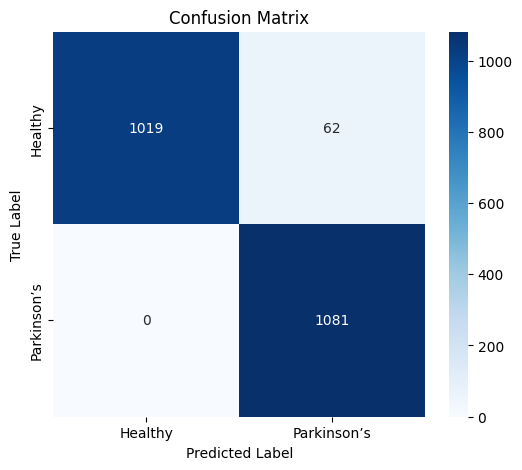

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Parkinson’s"], yticklabels=["Healthy", "Parkinson’s"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

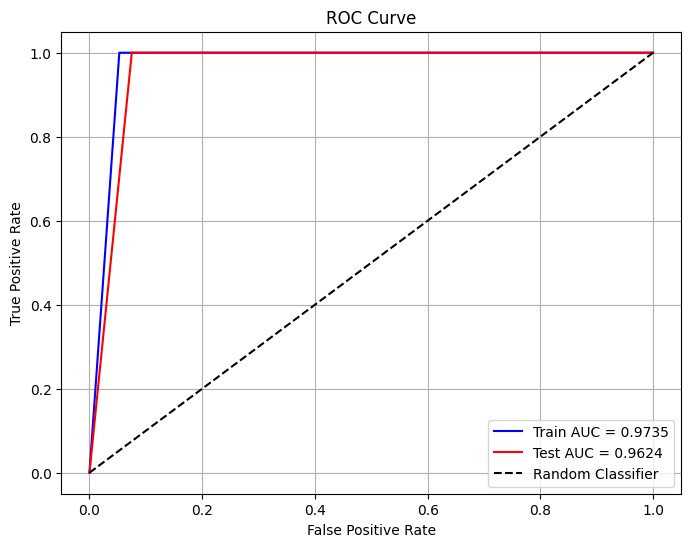

In [ ]:

train_fpr, train_tpr, _ = roc_curve(train_labels, train_preds)
test_fpr, test_tpr, _ = roc_curve(test_labels, test_preds)

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train AUC = {train_auc:.4f}', color='blue')
plt.plot(test_fpr, test_tpr, label=f'Test AUC = {test_auc:.4f}', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

FOR 5 EPOCHS

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model_path = "/content/drive/My Drive/parkinsons_bert_model_for3epochs"
model = BertForSequenceClassification.from_pretrained(model_path)
tokenizer = tokenizer.from_pretrained(model_path)


In [ ]:
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
import numpy as np
import evaluate

metric = evaluate.load("accuracy")


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    preds = predictions.argmax(axis=1)

    accuracy = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average="binary")
    auc_roc = roc_auc_score(labels, predictions[:, 1])

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "auc_roc": auc_roc,
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1,Auc Roc
1,0.074200,0.447849,0.949192,0.909091,1.000000,0.952381,0.971169
2,0.025200,0.150936,0.976905,0.956522,1.000000,0.977778,0.994281
3,0.069400,0.209729,0.974596,0.952381,1.000000,0.975610,0.994964
4,0.007300,0.222875,0.969977,0.944206,1.000000,0.971302,0.996180
5,0.085300,0.198720,0.974596,0.952381,1.000000,0.975610,0.997183


💾 Model saved as 'parkinsons_bert_model'!


In [ ]:
model_name = "parkinsons_bert_model_for5epochs"
drive_path = f"/content/drive/My Drive/{model_name}"
model.save_pretrained(drive_path)
tokenizer.save_pretrained(drive_path)

print(f"✅ Model saved in Google Drive at: {drive_path}")

✅ Model saved in Google Drive at: /content/drive/My Drive/parkinsons_bert_model_for5epochs


In [ ]:
from sklearn.metrics import (
    accuracy_score, roc_auc_score, confusion_matrix,
    precision_recall_fscore_support, roc_curve, auc
)
import matplotlib.pyplot as plt

train_results = trainer.predict(train_dataset)
test_results = trainer.predict(test_dataset)

train_accuracy = accuracy_score(train_labels, train_preds)
test_accuracy = accuracy_score(test_labels, test_preds)

print(f"✅ Training Accuracy: {train_accuracy:.4f}")
print(f"✅ Testing Accuracy: {test_accuracy:.4f}")

train_logits, train_labels = train_results.predictions, train_results.label_ids
test_logits, test_labels = test_results.predictions, test_results.label_ids

train_preds = np.argmax(train_logits, axis=-1)
test_preds = np.argmax(test_logits, axis=-1)

all_labels = np.concatenate([train_labels, test_labels])
all_preds = np.concatenate([train_preds, test_preds])

auc_score = roc_auc_score(all_labels, all_preds)
precision, recall, f1, _ = precision_recall_fscore_support(all_labels, all_preds, average='binary')
cm = confusion_matrix(all_labels, all_preds)

print(f"📊 AUC-ROC Score: {auc_score:.4f}")
print(f"📊 Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")

✅ Training Accuracy: 0.9994
✅ Testing Accuracy: 0.9746
📊 AUC-ROC Score: 0.9944
📊 Precision: 0.9890, Recall: 1.0000, F1-score: 0.9945


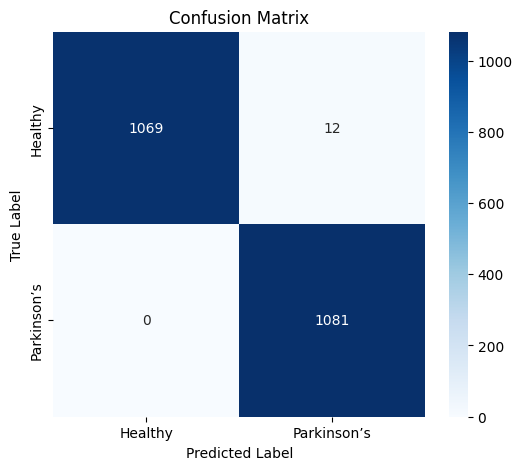

In [ ]:
import seaborn as sns
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Parkinson’s"], yticklabels=["Healthy", "Parkinson’s"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

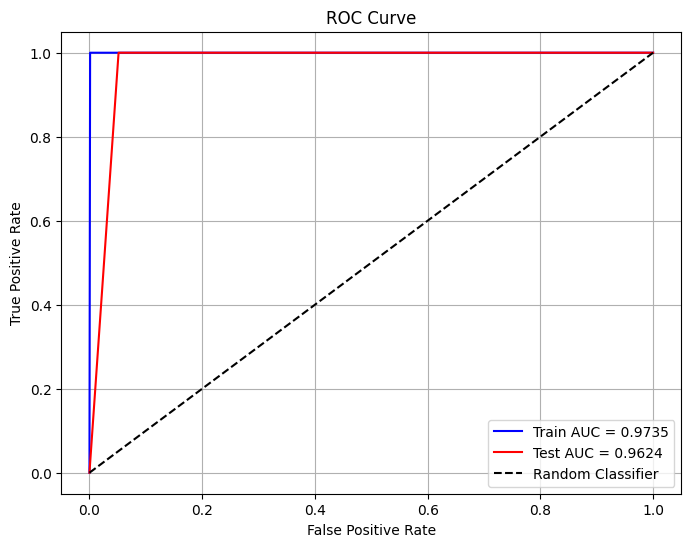

In [ ]:
train_fpr, train_tpr, _ = roc_curve(train_labels, train_preds)
test_fpr, test_tpr, _ = roc_curve(test_labels, test_preds)

plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label=f'Train AUC = {train_auc:.4f}', color='blue')
plt.plot(test_fpr, test_tpr, label=f'Test AUC = {test_auc:.4f}', color='red')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

In [ ]:
drive_path = "/content/drive/MyDrive/text_dataset/"
# Define file paths
model_save_path = os.path.join(drive_path, "bert_parkinsons_model_final.pth")
tokenizer_save_path = os.path.join(drive_path, "bert_tokenizer")

# Save model state dict
torch.save(model.state_dict(), model_save_path)
model.config.save_pretrained(drive_path)
# Save tokenizer
tokenizer.save_pretrained(tokenizer_save_path)

print(f"Model saved to: {model_save_path}")
print(f"Tokenizer saved to: {tokenizer_save_path}/")

Model saved to: /content/drive/MyDrive/text_dataset/bert_parkinsons_model_final.pth
Tokenizer saved to: /content/drive/MyDrive/text_dataset/bert_tokenizer/


In [ ]:
tokenizer.save_pretrained("/content/drive/MyDrive/NeuroSpeechBERT_Model/bert_tokenizer")


('/content/drive/MyDrive/NeuroSpeechBERT_Model/bert_tokenizer/tokenizer_config.json',
 '/content/drive/MyDrive/NeuroSpeechBERT_Model/bert_tokenizer/special_tokens_map.json',
 '/content/drive/MyDrive/NeuroSpeechBERT_Model/bert_tokenizer/vocab.txt',
 '/content/drive/MyDrive/NeuroSpeechBERT_Model/bert_tokenizer/added_tokens.json',
 '/content/drive/MyDrive/NeuroSpeechBERT_Model/bert_tokenizer/tokenizer.json')

to load model next time

In [ ]:

import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer

# Define paths
drive_path = "/content/drive/MyDrive/text_dataset"
model_load_path = os.path.join(drive_path, "bert_parkinsons_model_final.pth")
tokenizer_load_path = "/content/drive/MyDrive/text_dataset/bert_tokenizer"

tokenizer = AutoTokenizer.from_pretrained(tokenizer_load_path, local_files_only=True)

# Load the model (ensure num_labels matches training)
model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)
model.load_state_dict(torch.load(model_load_path, map_location=torch.device("cpu")))  # Change to "cuda" if using GPU
model.eval()  # Set model to evaluation mode

print("Model and tokenizer loaded successfully from Google Drive!")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Model and tokenizer loaded successfully from Google Drive!


In [ ]:
# Define the correct label mapping
label_map = {"Healthy": 0, "Parkinson's": 1}

# Convert text labels to numerical values
df_balanced["label"] = df_balanced["label"].map(label_map)

# Drop any rows with NaN values (if there were unexpected labels)
df_balanced = df_balanced.dropna(subset=["label"])

# Convert labels to integer type
df_balanced["label"] = df_balanced["label"].astype(int)

# Check if conversion worked
print(df_balanced["label"].unique())  # Should print: [0 1]

# Run the assertion check again
assert df_balanced["label"].isin([0, 1]).all(), "Error: Found labels outside the range [0,1]!"



[1 0]


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
from transformers import BertForSequenceClassification, AdamW

# Load BERT model for classification
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

print("✅ Model ready for training!")


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✅ Model ready for training!


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
input_ids = tokens["input_ids"].to(device)
attention_mask = tokens["attention_mask"].to(device)

In [ ]:
import torch
import torch.nn as nn
from transformers import BertForSequenceClassification, AdamW, get_scheduler
from tqdm import tqdm  # For progress bar

df = pd.read_csv("transcriptions_balanced.csv")
label_map = {"Healthy": 0, "Parkinson's Disease": 1}  # Adjust as per your actual labels
df['label'] = df['label'].map(label_map)

optimizer = AdamW(model.parameters(), lr=2e-5)
print("✅ Model ready for training!")


✅ Model ready for training!


/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:640: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
from transformers import get_scheduler

# Assuming tokens["input_ids"], tokens["attention_mask"], and labels are tensors
batch_size = 16
dataset = TensorDataset(tokens["input_ids"], tokens["attention_mask"], labels)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

NameError: name 'tokens' is not defined

In [ ]:
input_ids = tokens["input_ids"]
attention_mask = tokens["attention_mask"]
model.train()
optimizer.zero_grad()
outputs = model(input_ids, attention_mask=attention_mask)

loss_fn = nn.CrossEntropyLoss()
loss = loss_fn(outputs.logits, labels)

# Backpropagation
loss.backward()
optimizer.step()

lr_scheduler = get_scheduler(
    "linear", optimizer=optimizer, num_warmup_steps=0, num_training_steps=len(input_ids) * 3
)
lr_scheduler.step()

# Show loss for the entire dataset
print(f"Epoch {epoch+1}/{3} - Loss: {loss.item()}")

print("✅ Training complete!")

# Save trained model
model.save_pretrained("parkinsons_bert_model")
print("💾 Model saved as 'parkinsons_bert_model'!")


In [ ]:
batch_labels[batch_labels == -9223372036854775808] = 0  # Replace with 0 or the correct label



In [ ]:
torch.save(model.state_dict(), "parkinsons_bert_model.pth")
print("💾 Model weights saved as 'parkinsons_bert_model.pth'!")



💾 Model weights saved as 'parkinsons_bert_model.pth'!


In [ ]:
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for batch in test_dataloader:  # Use test_dataloader
        input_ids, attention_mask, labels = [x.to(device) for x in batch]

        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)

        correct += (predictions == labels).sum().item()
        total += labels.size(0)

accuracy = correct / total
print(f"📊 Test Accuracy: {accuracy * 100:.2f}%")

📊 Test Accuracy: 97.23%



📊 **Classification Report:**
              precision    recall  f1-score   support

     Healthy       1.00      0.95      0.97       229
 Parkinson's       0.95      1.00      0.97       204

    accuracy                           0.97       433
   macro avg       0.97      0.97      0.97       433
weighted avg       0.97      0.97      0.97       433



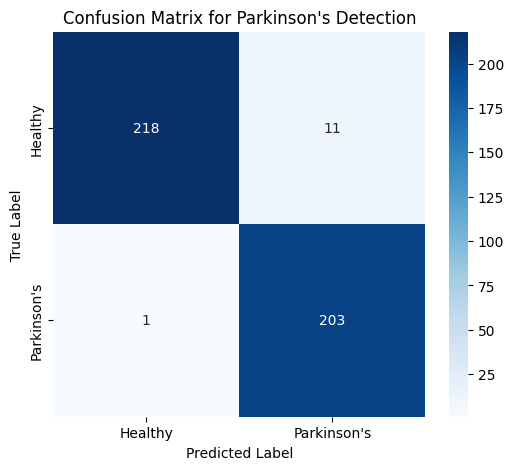

In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

true_labels = []
pred_labels = []

# Get predictions on test data
with torch.no_grad():
    for batch in test_dataloader:
        input_ids, attention_mask, labels = [x.to(device) for x in batch]
        outputs = model(input_ids, attention_mask=attention_mask)
        predictions = torch.argmax(outputs.logits, dim=1)

        true_labels.extend(labels.cpu().numpy())
        pred_labels.extend(predictions.cpu().numpy())

# Print classification report
print("\n📊 **Classification Report:**")
print(classification_report(true_labels, pred_labels, target_names=["Healthy", "Parkinson's"]))

# Generate confusion matrix
cm = confusion_matrix(true_labels, pred_labels)

# Plot beautifully
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Healthy", "Parkinson's"], yticklabels=["Healthy", "Parkinson's"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Parkinson's Detection")
plt.show()



In [ ]:
model.save_pretrained("parkinsons_bert_model")
tokenizer.save_pretrained("parkinsons_bert_model")


('parkinsons_bert_model/tokenizer_config.json',
 'parkinsons_bert_model/special_tokens_map.json',
 'parkinsons_bert_model/vocab.txt',
 'parkinsons_bert_model/added_tokens.json',
 'parkinsons_bert_model/tokenizer.json')

In [ ]:
import json

metrics = {
    "test_accuracy": 97.23,
    "classification_report": {
        "Healthy": {"precision": 1.00, "recall": 0.95, "f1-score": 0.97},
        "Parkinson's": {"precision": 0.95, "recall": 1.00, "f1-score": 0.97},
        "accuracy": 0.97
    }
}

with open("training_results.json", "w") as f:
    json.dump(metrics, f, indent=4)

print("✅ Training results saved!")


✅ Training results saved!


In [ ]:
model.load_state_dict(torch.load("bert_parkinsons.pt"))
model.to(device)


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask)
    predictions = torch.argmax(outputs.logits, dim=1)
print(predictions)


tensor([1, 0], device='cuda:0')


In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

# Load the trained model (if not already loaded)
model_path = "bert_parkinsons.pt"
model.load_state_dict(torch.load(model_path))
model.to("cuda" if torch.cuda.is_available() else "cpu")
model.eval()  # Set model to evaluation mode


FileNotFoundError: [Errno 2] No such file or directory: 'bert_parkinsons.pt'

In [ ]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

ROBERTa

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset


In [ ]:
df = pd.read_csv("transcriptions_balanced.csv")
label_mapping = {"Healthy": 0, "Parkinson's": 1}
df['label'] = df['label'].map(label_mapping)

# Drop any rows where mapping failed (i.e., label is NaN)
df = df.dropna(subset=['label'])

# Convert to int
df['label'] = df['label'].astype(int)

# Prepare lists
X = df['cleaned_transcription'].astype(str).tolist()
y = df['label'].tolist()

In [ ]:
train_texts, test_texts, train_labels, test_labels = train_test_split(X, y, test_size=0.2, random_state=42)


# Load RoBERTa tokenizer
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")


In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt')

In [ ]:
print(set(y))  # Should only show {0, 1}

{0, 1}


In [ ]:
class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels)

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)


In [ ]:
import torch

# Define device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments, EvalPrediction
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=2).to(device)

# 6. Metrics function
def compute_metrics(p: EvalPrediction):
    preds = torch.argmax(torch.tensor(p.predictions), axis=1)
    labels = torch.tensor(p.label_ids)
    acc = accuracy_score(labels, preds)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

# 7. Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir='./logs',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.01,
    load_best_model_at_end=True,
    logging_steps=10,
    report_to="none"
)

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# 9. Train the model
trainer.train()

# 10. Evaluate
results = trainer.evaluate()
print("Evaluation Results:", results)

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.216400,0.181550,0.967667,0.935780,1.000000,0.966825
2,0.207500,0.147822,0.969977,0.940092,1.000000,0.969121
3,0.219600,0.100894,0.972286,0.952830,0.990196,0.971154
4,0.012000,0.110722,0.976905,0.953271,1.000000,0.976077
5,0.000300,0.121514,0.979215,0.957746,1.000000,0.978417


Evaluation Results: {'eval_loss': 0.10089365392923355, 'eval_accuracy': 0.9722863741339491, 'eval_precision': 0.9528301886792453, 'eval_recall': 0.9901960784313726, 'eval_f1': 0.9711538461538461, 'eval_runtime': 2.5408, 'eval_samples_per_second': 170.417, 'eval_steps_per_second': 21.646, 'epoch': 5.0}


Train Accuracy: 0.9919
Test Accuracy: 0.9723

--- Test Classification Report ---
              precision    recall  f1-score   support

     Healthy       0.99      0.96      0.97       229
 Parkinson's       0.95      0.99      0.97       204

    accuracy                           0.97       433
   macro avg       0.97      0.97      0.97       433
weighted avg       0.97      0.97      0.97       433



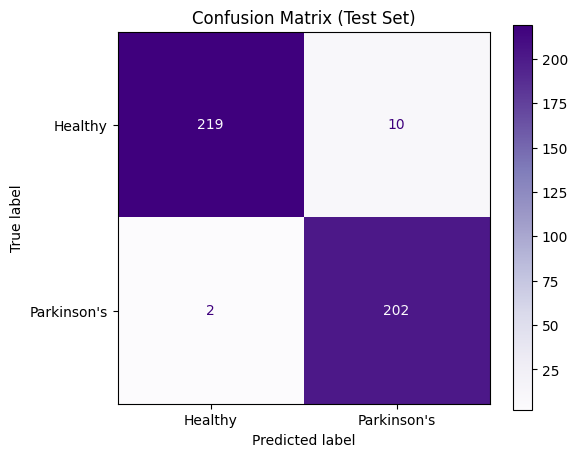

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# predictions and probabilities
def get_preds_probs(model, dataset):
    trainer.model.eval()
    outputs = trainer.predict(dataset)
    probs = torch.nn.functional.softmax(torch.tensor(outputs.predictions), dim=1).numpy()
    preds = np.argmax(probs, axis=1)
    labels = outputs.label_ids
    return labels, preds, probs[:, 1]

# Get predictions
train_labels_true, train_preds, train_probs = get_preds_probs(model, train_dataset)
test_labels_true, test_preds, test_probs = get_preds_probs(model, test_dataset)


from sklearn.metrics import accuracy_score
train_acc = accuracy_score(train_labels_true, train_preds)
test_acc = accuracy_score(test_labels_true, test_preds)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")


print("\n--- Test Classification Report ---")
print(classification_report(test_labels_true, test_preds, target_names=["Healthy", "Parkinson's"]))


cm = confusion_matrix(test_labels_true, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Parkinson's"])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap=plt.cm.Purples, ax=ax, values_format='d')
plt.title("Confusion Matrix (Test Set)")
plt.show()

Train ROC-AUC Score: 0.9996
Test ROC-AUC Score: 0.9963


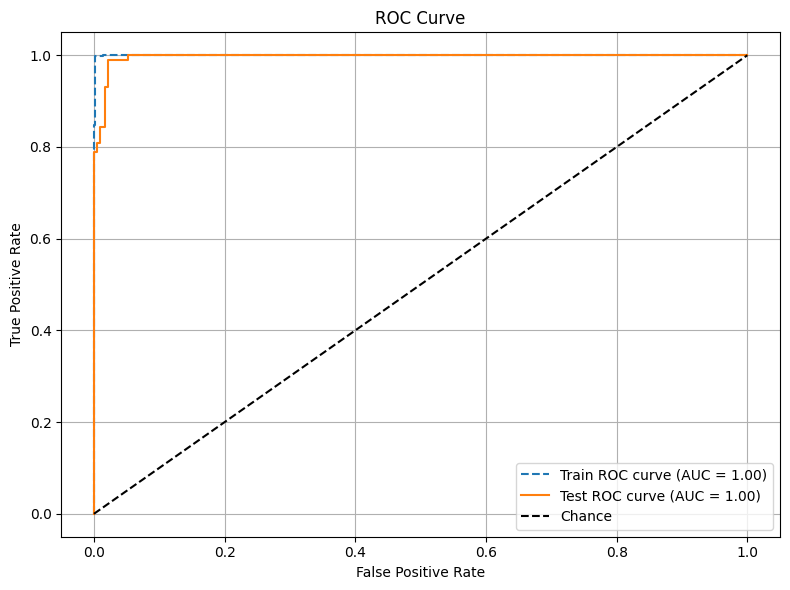

In [ ]:
# 4. AUC-ROC Score
train_auc = roc_auc_score(train_labels_true, train_probs)
test_auc = roc_auc_score(test_labels_true, test_probs)
print(f"Train ROC-AUC Score: {train_auc:.4f}")
print(f"Test ROC-AUC Score: {test_auc:.4f}")

# 5. AUC-ROC Curve Plot
fpr_train, tpr_train, _ = roc_curve(train_labels_true, train_probs)
fpr_test, tpr_test, _ = roc_curve(test_labels_true, test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC curve (AUC = {train_auc:.2f})", linestyle="--")
plt.plot(fpr_test, tpr_test, label=f"Test ROC curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model_name = "parkinsons_ROBERTa_final_model"
drive_path = f"/content/drive/My Drive/bertsaved_models/{model_name}"

model.save_pretrained(drive_path)
tokenizer.save_pretrained(drive_path)

print(f"✅ Model saved in Google Drive at: {drive_path}")

✅ Model saved in Google Drive at: /content/drive/My Drive/bertsaved_models/parkinsons_ROBERTa_final_model


In [ ]:
#TO LOAD MODEL
from transformers import RobertaTokenizer, RobertaForSequenceClassification

drive_path = "/content/drive/My Drive/bertsaved_models/parkinsons_ROBERTa_final_model"

# Load model and tokenizer
tokenizer = RobertaTokenizer.from_pretrained(drive_path)
model = RobertaForSequenceClassification.from_pretrained(drive_path)


ELECTRa

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import ElectraTokenizer, ElectraForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

In [ ]:
df = pd.read_csv("transcriptions_balanced.csv")
label_mapping = {"Healthy": 0, "Parkinson's": 1}
df['label'] = df['label'].map(label_mapping)

# Drop any rows where mapping failed (i.e., label is NaN)
df = df.dropna(subset=['label'])

# Convert to int
df['label'] = df['label'].astype(int)

# Prepare lists
X = df['cleaned_transcription'].astype(str).tolist()
y = df['label'].tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tokenizer = ElectraTokenizer.from_pretrained("google/electra-base-discriminator")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/666 [00:00<?, ?B/s]

In [ ]:
train_encodings = tokenizer(train_texts, truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(test_texts, truncation=True, padding=True, return_tensors='pt')

In [ ]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# Create dataset objects
train_dataset = CustomDataset(train_encodings, train_labels)
test_dataset = CustomDataset(test_encodings, test_labels)

In [ ]:
def compute_metrics(p):
    preds = torch.argmax(torch.tensor(p.predictions), axis=1)
    labels = torch.tensor(p.label_ids)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./results_electra",
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    warmup_steps=10,
    weight_decay=0.01,
    logging_dir='./logs_electra',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    report_to='none'
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from transformers import ElectraForSequenceClassification

model = ElectraForSequenceClassification.from_pretrained("google/electra-base-discriminator", num_labels=2)

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,No log,0.142547,0.963048,0.960784,0.960784,0.960784
2,No log,0.067100,0.988453,0.976077,1.000000,0.987893
3,0.160000,0.096381,0.979215,0.957746,1.000000,0.978417
4,0.160000,0.066046,0.988453,0.976077,1.000000,0.987893
5,0.020400,0.044144,0.988453,0.976077,1.000000,0.987893


TrainOutput(global_step=1085, training_loss=0.0831967241272399, metrics={'train_runtime': 392.054, 'train_samples_per_second': 22.051, 'train_steps_per_second': 2.767, 'total_flos': 959594796669600.0, 'train_loss': 0.0831967241272399, 'epoch': 5.0})

Train Accuracy: 0.9965
Test Accuracy: 0.9885

--- Test Classification Report ---
              precision    recall  f1-score   support

     Healthy       1.00      0.98      0.99       229
 Parkinson's       0.98      1.00      0.99       204

    accuracy                           0.99       433
   macro avg       0.99      0.99      0.99       433
weighted avg       0.99      0.99      0.99       433



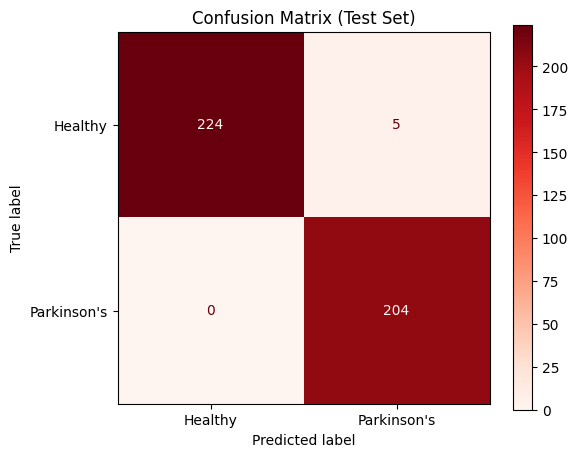

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to get predictions and probabilities
def get_preds_probs(model, dataset):
    trainer.model.eval()
    outputs = trainer.predict(dataset)
    probs = torch.nn.functional.softmax(torch.tensor(outputs.predictions), dim=1).numpy()
    preds = np.argmax(probs, axis=1)
    labels = outputs.label_ids
    return labels, preds, probs[:, 1]  # Return true labels, predicted labels, and probability of class 1

# Get predictions
train_labels_true, train_preds, train_probs = get_preds_probs(model, train_dataset)
test_labels_true, test_preds, test_probs = get_preds_probs(model, test_dataset)

# 1. Accuracy
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(train_labels_true, train_preds)
test_acc = accuracy_score(test_labels_true, test_preds)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# 2. Classification Report (Precision, Recall, F1)
print("\n--- Test Classification Report ---")
print(classification_report(test_labels_true, test_preds, target_names=["Healthy", "Parkinson's"]))

# 3. Confusion Matrix
cm = confusion_matrix(test_labels_true, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Parkinson's"])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap=plt.cm.Reds, ax=ax, values_format='d')
plt.title("Confusion Matrix (Test Set)")
plt.show()

Train ROC-AUC Score: 0.9998
Test ROC-AUC Score: 0.9970


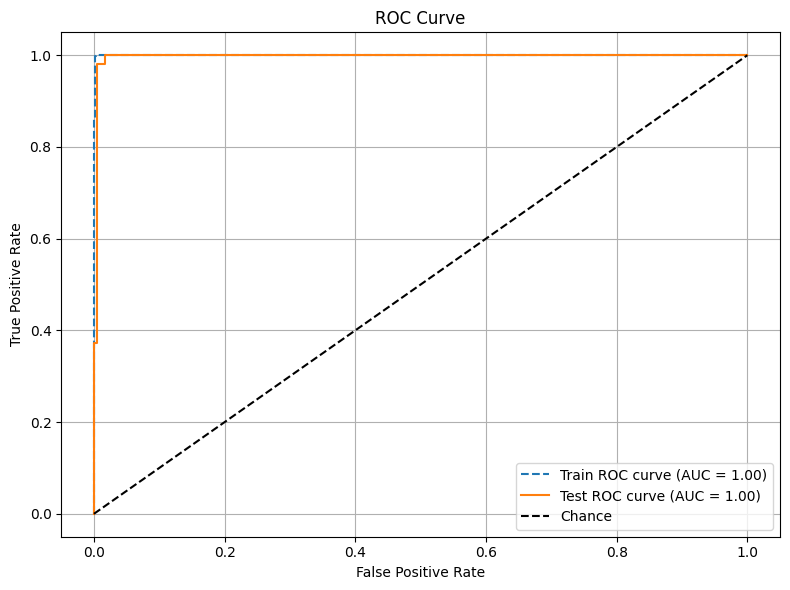

In [ ]:
# 4. AUC-ROC Score
train_auc = roc_auc_score(train_labels_true, train_probs)
test_auc = roc_auc_score(test_labels_true, test_probs)
print(f"Train ROC-AUC Score: {train_auc:.4f}")
print(f"Test ROC-AUC Score: {test_auc:.4f}")

# 5. AUC-ROC Curve Plot
fpr_train, tpr_train, _ = roc_curve(train_labels_true, train_probs)
fpr_test, tpr_test, _ = roc_curve(test_labels_true, test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC curve (AUC = {train_auc:.2f})", linestyle="--")
plt.plot(fpr_test, tpr_test, label=f"Test ROC curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model_name = "parkinsons_ELECTRa_final_model"
drive_path = f"/content/drive/My Drive/bertsaved_models/{model_name}"

# Save the entire model
model.save_pretrained(drive_path)
tokenizer.save_pretrained(drive_path)

print(f"✅ Model saved in Google Drive at: {drive_path}")

✅ Model saved in Google Drive at: /content/drive/My Drive/bertsaved_models/parkinsons_ELECTRa_final_model


ALBERTa

In [ ]:
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from transformers import AlbertTokenizer, AlbertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, roc_auc_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Load and prepare data
df = pd.read_csv("transcriptions_balanced.csv")
df['label'] = df['label'].map({"Healthy": 0, "Parkinson's": 1})
df = df.dropna(subset=['label'])
df['label'] = df['label'].astype(int)

X = df['cleaned_transcription'].astype(str).tolist()
y = df['label'].tolist()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Tokenization
tokenizer = AlbertTokenizer.from_pretrained("albert-base-v2")
train_encodings = tokenizer(X_train, truncation=True, padding=True)
test_encodings = tokenizer(X_test, truncation=True, padding=True)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/760k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.31M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/684 [00:00<?, ?B/s]

In [ ]:
class SpeechDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels
    def __len__(self):
        return len(self.labels)
    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

train_dataset = SpeechDataset(train_encodings, y_train)
test_dataset = SpeechDataset(test_encodings, y_test)

In [ ]:
model = AlbertForSequenceClassification.from_pretrained("albert-base-v2", num_labels=2)

# 6. Define Metrics
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'precision': precision,
        'recall': recall,
        'f1': f1,
    }


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/47.4M [00:00<?, ?B/s]

Some weights of AlbertForSequenceClassification were not initialized from the model checkpoint at albert-base-v2 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
training_args = TrainingArguments(
    output_dir="./albert_results",
    num_train_epochs=5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    load_best_model_at_end=True,
    metric_for_best_model="eval_loss",
    report_to=[]  # Important to avoid logging errors
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
# 8. Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics
)

# 9. Train
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.459300,0.621329,0.780600,0.682274,1.000000,0.811133
2,0.188300,0.171679,0.965358,0.960976,0.965686,0.963325
3,0.135200,0.152582,0.969977,0.940092,1.000000,0.969121
4,0.000700,0.155315,0.974596,0.957346,0.990196,0.973494
5,0.000400,0.135475,0.974596,0.948837,1.000000,0.973747


TrainOutput(global_step=1085, training_loss=0.19083646223708678, metrics={'train_runtime': 378.7431, 'train_samples_per_second': 22.825, 'train_steps_per_second': 2.865, 'total_flos': 91597643291700.0, 'train_loss': 0.19083646223708678, 'epoch': 5.0})

Train Accuracy: 0.9913
Test Accuracy: 0.9746

--- Test Classification Report ---
              precision    recall  f1-score   support

     Healthy       1.00      0.95      0.98       229
 Parkinson's       0.95      1.00      0.97       204

    accuracy                           0.97       433
   macro avg       0.97      0.98      0.97       433
weighted avg       0.98      0.97      0.97       433



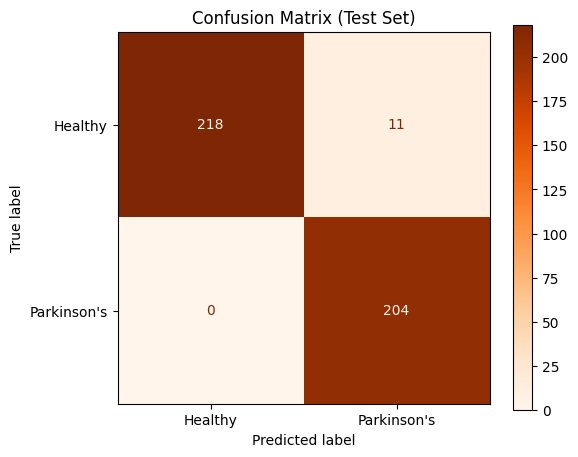

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Function to get predictions and probabilities
def get_preds_probs(model, dataset):
    trainer.model.eval()
    outputs = trainer.predict(dataset)
    probs = torch.nn.functional.softmax(torch.tensor(outputs.predictions), dim=1).numpy()
    preds = np.argmax(probs, axis=1)
    labels = outputs.label_ids
    return labels, preds, probs[:, 1]  # Return true labels, predicted labels, and probability of class 1

# Get predictions
train_labels_true, train_preds, train_probs = get_preds_probs(model, train_dataset)
test_labels_true, test_preds, test_probs = get_preds_probs(model, test_dataset)

# 1. Accuracy
from sklearn.metrics import accuracy_score
train_acc = accuracy_score(train_labels_true, train_preds)
test_acc = accuracy_score(test_labels_true, test_preds)
print(f"Train Accuracy: {train_acc:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# 2. Classification Report (Precision, Recall, F1)
print("\n--- Test Classification Report ---")
print(classification_report(test_labels_true, test_preds, target_names=["Healthy", "Parkinson's"]))

# 3. Confusion Matrix
cm = confusion_matrix(test_labels_true, test_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Healthy", "Parkinson's"])
fig, ax = plt.subplots(figsize=(6, 5))
disp.plot(cmap=plt.cm.Oranges, ax=ax, values_format='d')
plt.title("Confusion Matrix (Test Set)")
plt.show()

Train ROC-AUC Score: 1.0000
Test ROC-AUC Score: 0.9992


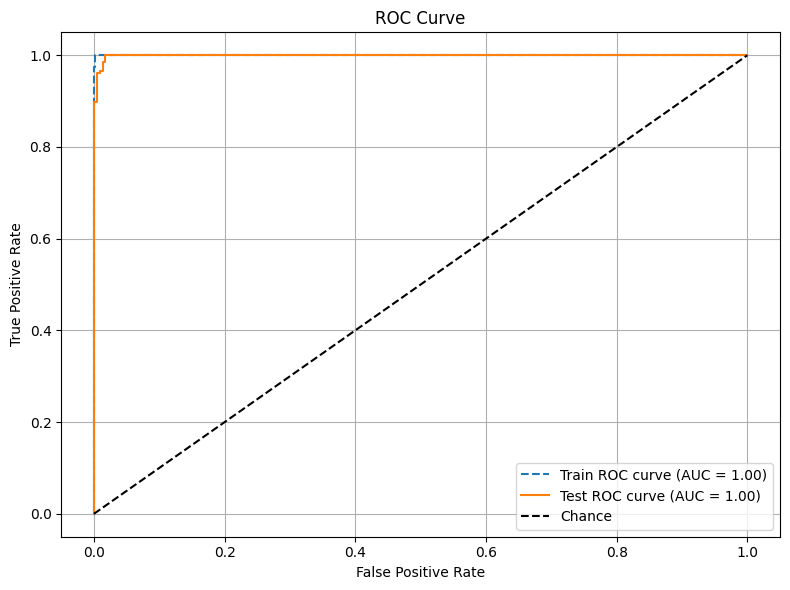

In [ ]:
# 4. AUC-ROC Score
train_auc = roc_auc_score(train_labels_true, train_probs)
test_auc = roc_auc_score(test_labels_true, test_probs)
print(f"Train ROC-AUC Score: {train_auc:.4f}")
print(f"Test ROC-AUC Score: {test_auc:.4f}")

# 5. AUC-ROC Curve Plot
fpr_train, tpr_train, _ = roc_curve(train_labels_true, train_probs)
fpr_test, tpr_test, _ = roc_curve(test_labels_true, test_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f"Train ROC curve (AUC = {train_auc:.2f})", linestyle="--")
plt.plot(fpr_test, tpr_test, label=f"Test ROC curve (AUC = {test_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
model_name = "parkinsons_ALBERTa_final_model"
drive_path = f"/content/drive/My Drive/bertsaved_models/{model_name}"

# Save the entire model
model.save_pretrained(drive_path)
tokenizer.save_pretrained(drive_path)

print(f"✅ Model saved in Google Drive at: {drive_path}")

✅ Model saved in Google Drive at: /content/drive/My Drive/bertsaved_models/parkinsons_ALBERTa_final_model
